In [71]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import copy

%matplotlib inline  

In [72]:
np.random.seed(123)

train_x = np.array([i + 1 for i in range(17)]) 
train_y = np.array([x + np.random.randint(4) for x in train_x])

print('train_x = ' + str(train_x))
print('train_y = ' + str(train_y))

train_x = [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
train_y = [ 3  3  5  6  5  8  9  9 12 12 14 13 15 15 15 17 19]


[-1.63299316 -1.42886902 -1.22474487 -1.02062073 -0.81649658 -0.61237244
 -0.40824829 -0.20412415  0.          0.20412415  0.40824829  0.61237244
  0.81649658  1.02062073  1.22474487  1.42886902  1.63299316]


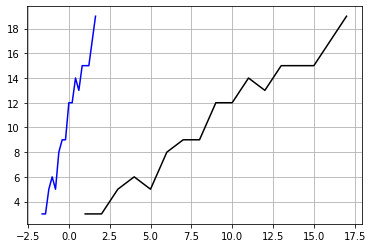

In [73]:
# average
m = train_x.mean()

# standard deviation
std = train_x.std()

def standardize(x):
    return (x - m) / std 

train_z = standardize(train_x)
print(train_z)

plt.plot(train_x, train_y, color='black')
plt.plot(train_z, train_y, color='blue')
plt.grid(True)
plt.show()

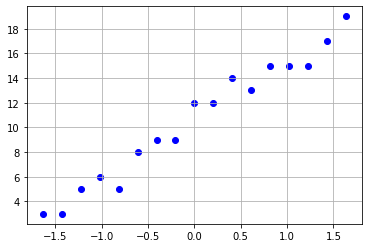

In [74]:
#plt.scatter(train_x, train_y, color='black')
plt.scatter(train_z, train_y, color='blue')
plt.grid(True)
plt.show()

In [75]:
for x, y in zip(train_z, train_y):
        print(x, '->', y)
        

-1.6329931618554523 -> 3
-1.4288690166235207 -> 3
-1.2247448713915892 -> 5
-1.0206207261596576 -> 6
-0.8164965809277261 -> 5
-0.6123724356957946 -> 8
-0.4082482904638631 -> 9
-0.20412414523193154 -> 9
0.0 -> 12
0.20412414523193154 -> 12
0.4082482904638631 -> 14
0.6123724356957946 -> 13
0.8164965809277261 -> 15
1.0206207261596576 -> 15
1.2247448713915892 -> 15
1.4288690166235207 -> 17
1.6329931618554523 -> 19


In [87]:
class Node:
    def __init__(self):
        self.w = 1.0 
        self.b = 1.0 
        
    def forpass(self, x):
        y_hat = x * self.w + self.b # ax + b
        return y_hat
    
    # w(angle), (y-y^) * x, err
    # err= predict - actual
    def backprop(self, x, err):
        w_grad = err * x  # (y - y^) * x
        b_grad = err      # (y - y^)
        return w_grad, b_grad

    # epochs: time of learning cycle
    def fit(self, x, y, epochs=1): 
        for i in range(epochs):
            for x_i, y_i in zip(x, y):
                y_hat = self.forpass(x_i) 
                err = -(y_i - y_hat)
                w_grad, b_grad = self.backprop(x_i, err)               
             
                # update weight a
                self.w = self.w - w_grad
                # update constant b
                self.b = self.b - b_grad 
                
                #print('err = {0:.3f}'.format(err))
                #print('self.w = {0:.3f}, self.b = {1:.3f}'.format(self.w, self.b))

In [81]:
node = Node()
node.fit(train_z, train_y)

err = -0.633
self.w = -0.034, self.b = 4.633
err = 1.681
self.w = 2.368, self.b = 2.952
err = -4.949
self.w = -3.693, self.b = 7.901
err = 5.669
self.w = 2.094, self.b = 2.231
err = -4.478
self.w = -1.563, self.b = 6.710
err = -0.333
self.w = -1.767, self.b = 7.043
err = -1.236
self.w = -2.271, self.b = 8.279
err = -0.258
self.w = -2.324, self.b = 8.536
err = -3.464
self.w = -2.324, self.b = 12.000
err = -0.474
self.w = -2.227, self.b = 12.474
err = -2.435
self.w = -1.233, self.b = 14.909
err = 1.154
self.w = -1.940, self.b = 13.755
err = -2.829
self.w = 0.370, self.b = 16.584
err = 1.961
self.w = -1.632, self.b = 14.623
err = -2.376
self.w = 1.278, self.b = 16.999
err = 1.825
self.w = -1.330, self.b = 15.174
err = -5.998
self.w = 8.465, self.b = 21.171


-1.6329931618554523 1.6329931618554523
7.348638797290594 34.994206837551474


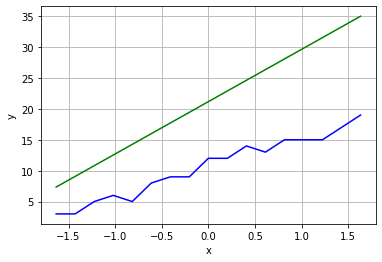

w=8.464691918504181, b=21.171422817421032


In [82]:
startx = np.min(train_z)
endx = np.max(train_z)

starty = startx * node.w + node.b
endy = endx * node.w + node.b

# model prediction
print(startx, endx)
print(starty, endy)

plt.plot(train_z, train_y, color='blue')
plt.plot([startx, endx], [starty, endy], color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

print('w={0}, b={1}'.format(node.w, node.b))

pd =  24.627118822453642


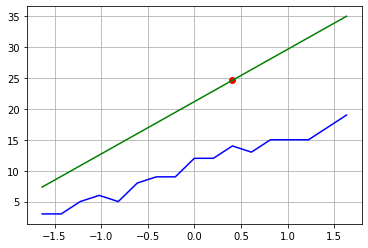

In [83]:
def trained_standardize(x):
    return (x - m) / std

new_x = trained_standardize(11)
new_y = 22
pd = new_x * node.w + node.b
print('pd = ', pd)

plt.plot(new_x, pd, 'ro')
plt.plot(train_z, train_y, color='blue')
plt.plot([startx, endx], [starty, endy], color='green')
plt.grid(True)
plt.show()

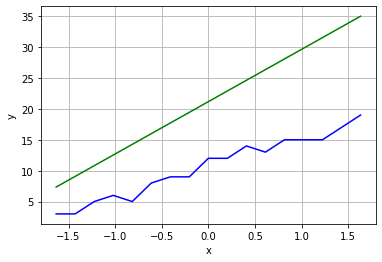

In [88]:
node = Node()
node.fit(train_z, train_y, 10)

plt.plot(train_z, train_y, color='blue')
plt.plot([startx, endx], [starty, endy], color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()